AN INTRODUCTION TO REGULARIZATION IN MACHINE LEARNING
Why Regularize?
Regularization plays a very important role in real world implementations of machine learning models. It is a statistical technique that minimizes overfitting and is executed during the model fitting step. It is also an embedded feature selection method because it is implemented while the parameters of the model are being calculated.

Machine learning algorithms are rarely deployed to production without using some form of regularization. The reason for this is as follows: In practice, every model has to deal with the question of how well it can generalize from known to unknown data. We can train, test and tune models on known data and make them as accurate as possible. However, in deploying models, we are applying them on new data. Regularization makes sure that our model is still accurate.

In this lesson, we are going to learn how regularization minimizes overfitting and how to use it as a feature selection method. Along the way, we are also going to learn two concepts that are very relevant to regularization and important just as standalone topics within machine learning, namely, the bias-variance tradeoff and hyperparameter tuning. But first, we’re going to answer the question: what is overfitting?

What is Overfitting?
It might have been pretty apparent which of the three curves in the previous exercise overfit the set of points. However, often we have too many features to be able to visually assess if our model is overfitting our data or not. And so we need to qualify what we mean by overfitting exactly.

If a model is able to represent a particular set of data points effectively but is not able to fit new data well, it is overfitting the data. Such a model has one or more of the following attributes:

It fits the training data well but performs significantly worse on test data
It typically has more parameters than necessary, i.e., it has high model complexity
It might be fitting for features that are multi-collinear (i.e., features that are highly negatively or positively correlated)
It might be fitting the noise in the data and likely mistaking the noise for features

In practice, we often catch overfitting by comparing the model performance on the training data versus test data. For instance if the R-squared score is high for training data but the model performs poorly on test data, it’s a strong indicator of overfitting. We’re going to look at one such example now


In [1]:
import os
current_path = os.getcwd()
print(current_path)

/Users/robertfokming/Documents/feature engineering


In [2]:
os.chdir('/Users/robertfokming/Documents/feature engineering')
current_path = os.getcwd()
print(current_path)

/Users/robertfokming/Documents/feature engineering


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

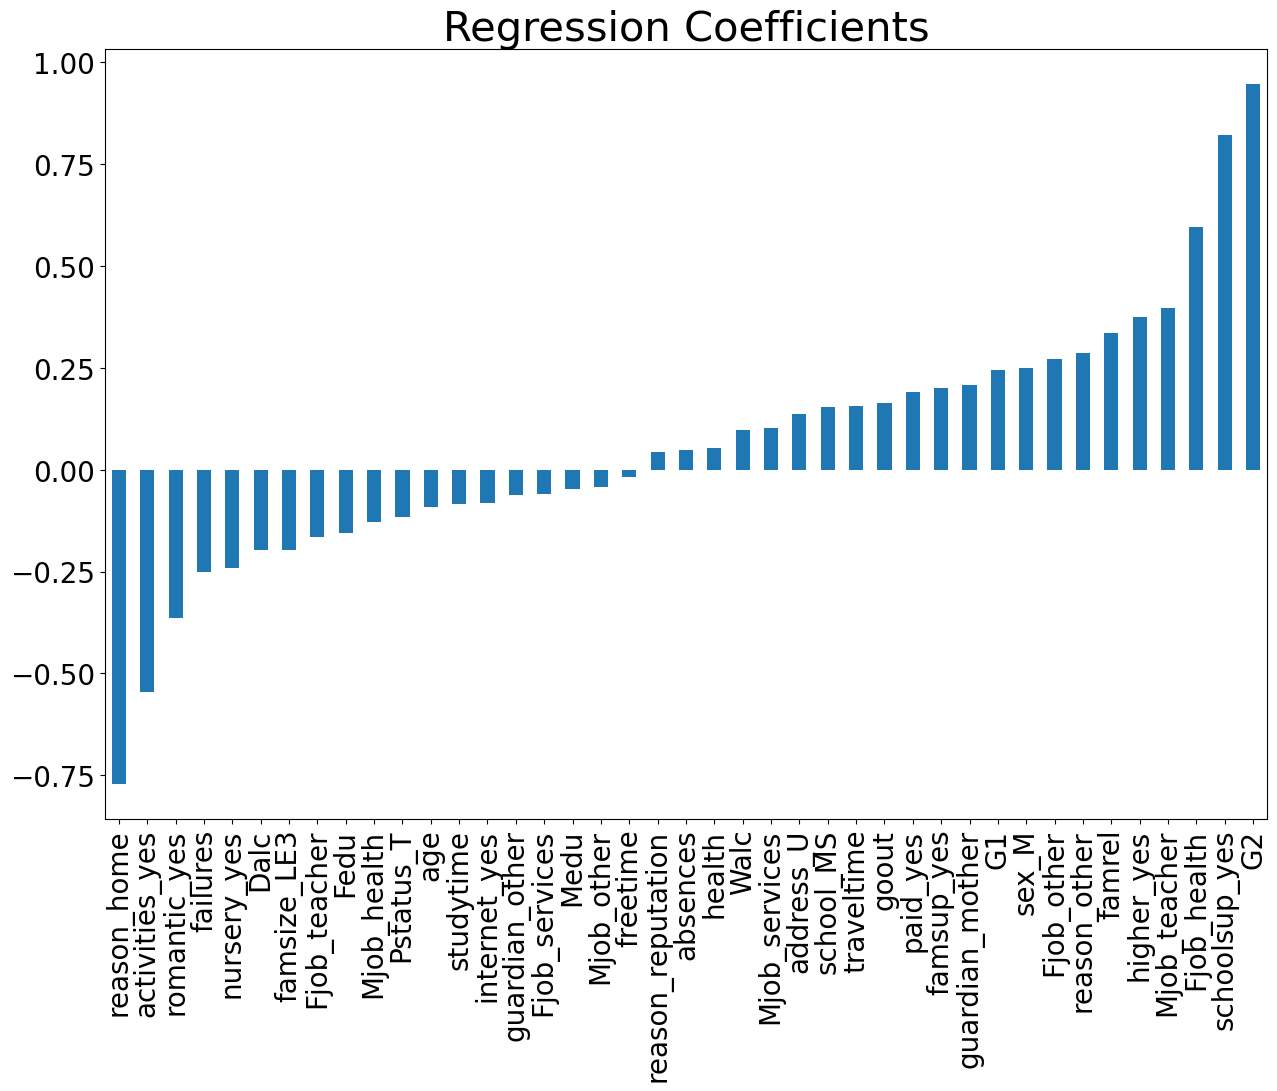

In [3]:
import pandas as pd
import numpy as np
#import codecademylib3
import matplotlib.pyplot as plt

df = pd.read_csv("student_math.csv")
print(df.head())

#setting target and predictor variables
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Number of features
num_features = None
print("Number of features: ",num_features)

#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fitting a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#Training Error
pred_train = model.predict(X_train)
MSE_train = np.mean((pred_train - y_train)**2)
print("Training Error: ", MSE_train)

# 2. Testing Error
#pred_test = model.predict(X_test)
#MSE_test = None
#print("Testing Error: ", MSE_test)

pred_test = model.predict(X_test)
MSE_test = np.mean((pred_test - y_test)**2)
print("Testing Error: ", MSE_test)

#Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

# 3. Plotting the Coefficients

plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()



We see that the error on the test data is almost double the error with the training data! This is definitely an indicator of overfitting. We’re now going to check the coefficients evaluated by the model to see if we can catch this.

Uncomment the plotting code below the comment # 3: Plotting the Coefficients and press “Run” to plot values of the coefficients produced.

We see that there are a few negatively correlated coefficients here (coefficients with roughly similar values mirrored about the axis), which is also a sign of overfitting.

In [14]:
The Loss Function
Let’s revisit how the coefficients (or parameters) of a linear regression model are obtained. 
Suppose we want to fit a linear regression with two features, x1 and x2:

SyntaxError: invalid character '’' (U+2019) (4158447455.py, line 2)

[77.30856619 18.87896326]


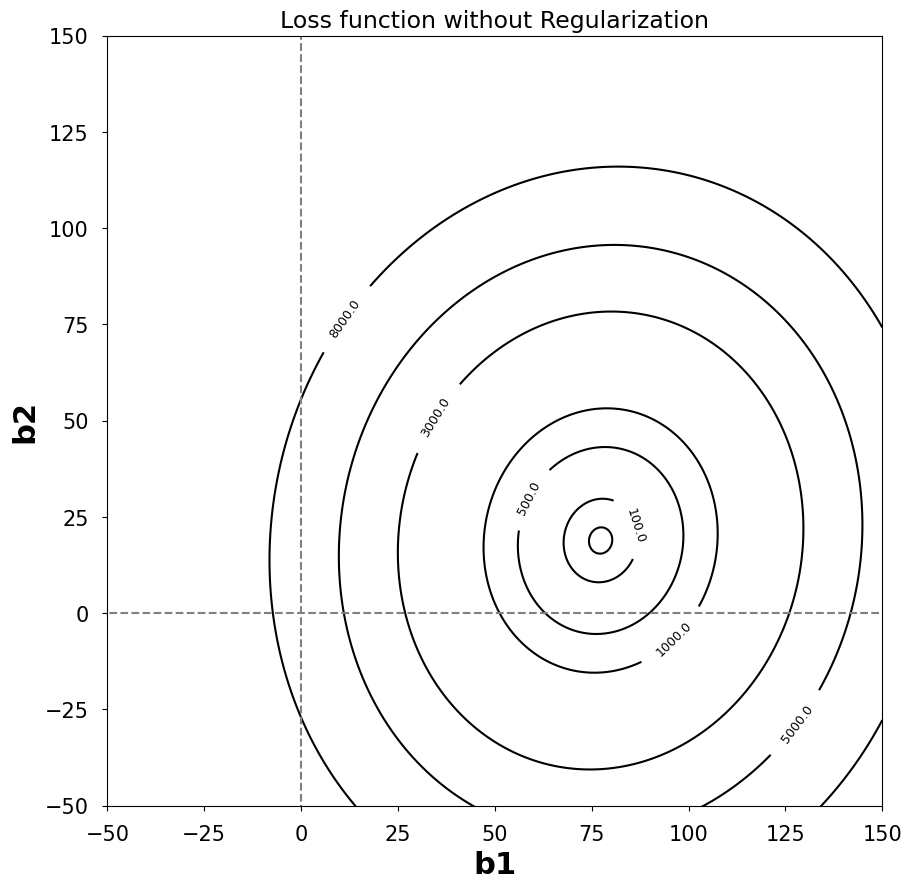

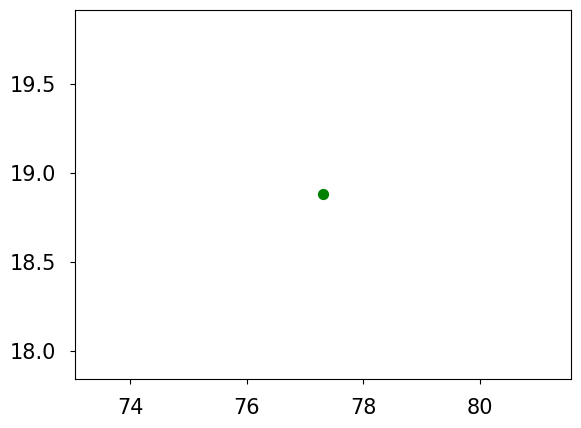

In [4]:
import numpy as np
#import codecademylib3
import matplotlib.pyplot as plt

from sklearn import datasets
data, y, coefficients = datasets.make_regression(n_samples = 100, n_features = 2, coef = True, random_state = 23)
x1 = data[:,0]
x2 = data[:,1]

# 1. Print the coefficients
print(coefficients)


# 2. Loss Function
def loss_function(b1,b2,y,x1,x2):
    error = y - b1*x1 - b2*x2
    loss = np.mean(error**2)
    return loss

# 3. Plot loss function for data
from plot_loss import plot_loss_function
b1 = np.linspace(-150, 150, 501)
b2 = np.linspace(-150, 150, 501)
contour_plot = plot_loss_function(b1,b2,y,x1,x2)
plt.show()


# 4. Plot the best fit coefficients
best_fit_b1 = coefficients[0]
best_fit_b2 = coefficients[1]
plt.scatter(best_fit_b1, best_fit_b2, s = 50, color = 'green')
plt.show()


Each ellipse in this plot represents the points where the loss function has the same value. The larger the ellipse, the higher the value of loss for all the points (b1,b2) that fall on the ellipse, as we can see from the labels on the contours.

Following this logic, the center of this set of concentric ellipses should represent the minimum value of the loss function and the value of the coefficients (b1,b2) at this point should be the solution of the regression problem and represent the best fit for our data. Let’s check if this is so by plotting the coefficients we had obtained earlier on! Complete the code under # 4. Plot the best fit coefficients to overplot the best fit coefficient values. (You will have to scroll down to see the new plot!)

In [ ]:
The Regularization Term
Regularization penalizes models for overfitting by adding a “penalty term” to the loss function. 
The two most commonly used ways of doing this are known as Lasso (or L1) and
Ridge (or L2) regularization.(We’ll explain the meaning behind their names in a moment!)

Both of these rely on penalizing overfitting by controlling how large the coefficients can get in the first place. The penalty term or regularization term is multiplied by a factor alpha and added to the old loss function as follows:

\text{New loss function} = \text{Old loss function} + \alpha* \text{Regularization term}New loss function=Old loss function+α∗Regularization term
Because of the additive term, minimizing the new loss function will necessarily mean “true loss” goes up, i.e., the scores on this will be lower on the training data than regression without regularization! But this is what we want when we are regularizing. Remember that the reason we’re regularizing is because our model is overfitted to our data (i.e., it is performing well on training data but doesn’t generalize well on test data).

The regularization term is the sum of the absolute values of the coefficients in the case of L1 regularization and the sum of the squares of the coefficients in the case of L2.

\text{L1 Regularization term: } |b_1| + |b_2|L1 Regularization term: ∣b 

\text{L2 Regularization term: } b_1^2 + b_2^2L2 Regularization term: b 


 
In mathematics, the sum of the magnitudes of a vector is known as its L1 norm 
(related to “Manhattan distance”) and the square root of the sum of the magnitudes 
(or the “Euclidean distance” from the origin) is known as its L2 norm - and that is the reason 
for the names of both methods!


Lasso (L1) Training Error:  3.0118464559476834
Lasso (L1) Testing Error:  4.272174214435373


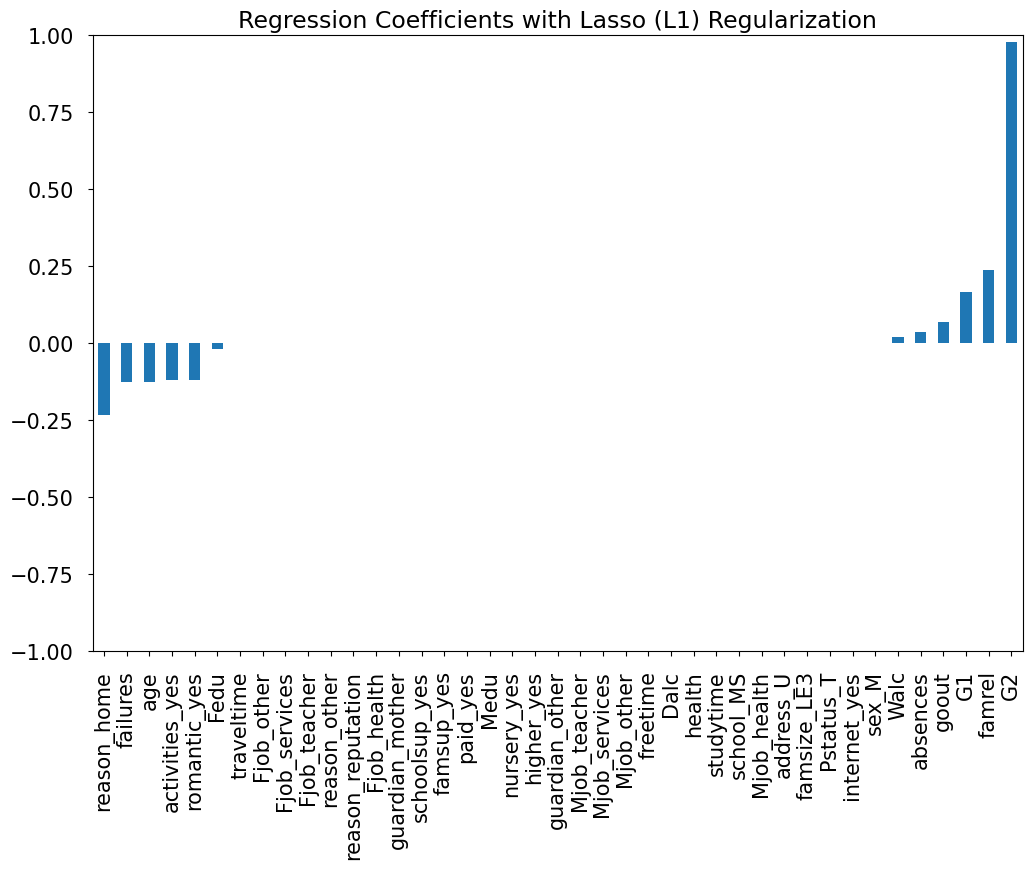

In [6]:
import pandas as pd
import numpy as np
#import codecademylib3
import matplotlib.pyplot as plt
import helpers


df = pd.read_csv("student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Train-test split and fitting an l1-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

l1_pred_train = lasso.predict(X_train)
l1_mse_train = np.mean((l1_pred_train - y_train)**2)
print("Lasso (L1) Training Error: ", l1_mse_train)

# 2. Calculate testing error
l1_pred_test = lasso.predict(X_test)
l1_mse_test = np.mean((l1_pred_test - y_test)**2)
print("Lasso (L1) Testing Error: ", l1_mse_test)

# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')
plt.show()

We see how our training error went up but our test error went down, which makes sense as our model is performing slightly better on test data at the cost of performing slightly worse on training data. What do our coefficients look like post Lasso regularization? Uncomment the code below # 3. Plotting the Coefficients, add a plt.show() and press “Run”.

Lasso has shrunk more than half our coefficients to zero! Additionally, while the value of all the coefficients have shrunk, Lasso has increased the relative importance of some. An important thing to note here is that we manually set the value of alpha to 0.1. The number of features that get eliminated due to Lasso is definitely tied to the value of alpha - we’re going to examine this more after we cover the basics of L2 or Ridge regularization.

Ridge:
The key difference here is that instead of a diamond-shaped area, we’re constraining the coefficients to live within a circle of radius s as shown in the figure here. The general goal is still similar though, we want to minimize the old loss while restricting the values of the coefficients to the boundary of this circle. Once again we want our new coefficient values to be as close to the unregularized best fit solution (i.e., the center of the contours) as possible while falling within the circle.

The value of (b1,b2) that minimizes this new loss function almost never lies on either axes. The solution here is not the pink dot that lies on the X axis like in L1, but rather the white dot that we have shown. The reason for this is as follows: The circle that contains the white and pink dots represents the smallest value of the old loss function that satisfies the regularization constraint, but while the pink dot makes the regularization term’s value s^2 exactly, the white dot makes it even smaller as it lies inside the circle!

Unlike Lasso, our Ridge coefficients can never be exactly zero! L2 regularization is therefore not a feature elimination method like L1. The coefficients of L2 get arbitrarily small but never zero. This is particularly useful when we don’t want to get rid of features during modeling but nonetheless want their relative importances emphasized.

Ridge (L2) Training Error:  2.8476069326177864
Ridge (L2) Testing Error:  4.357386340311293


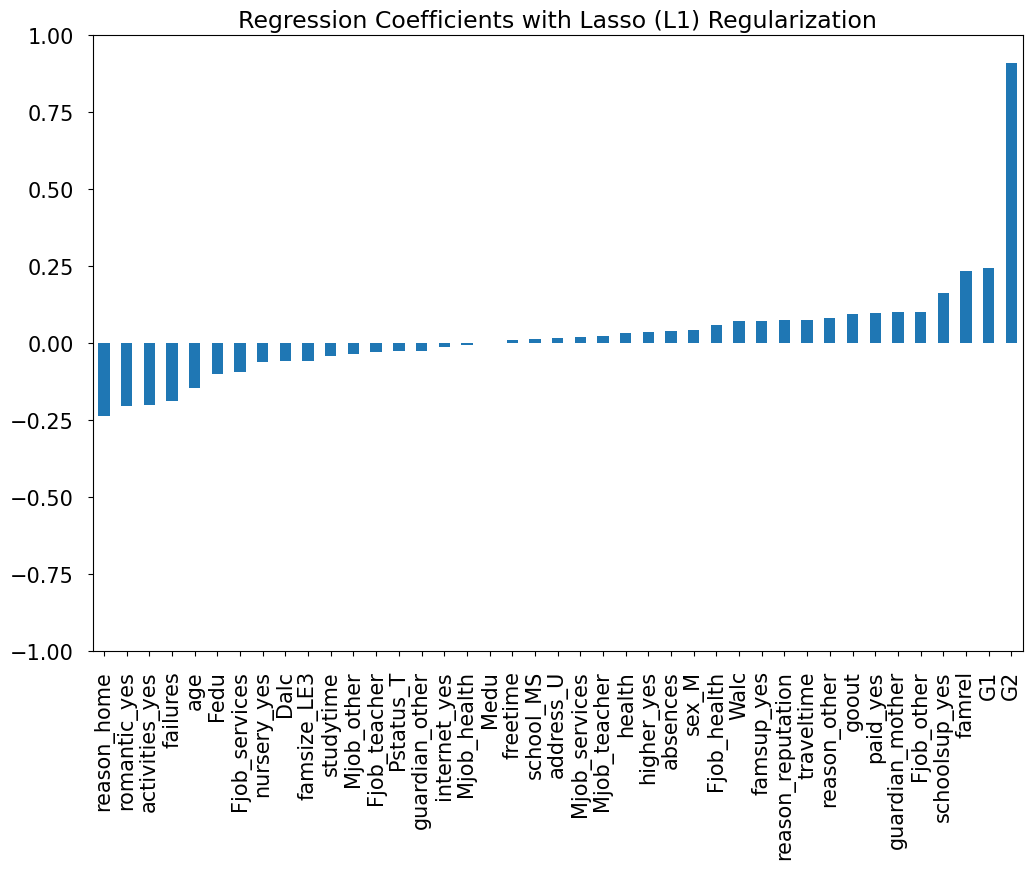

In [8]:
import pandas as pd
import numpy as np
#import codecademylib3
import matplotlib.pyplot as plt
import helpers

df = pd.read_csv("student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Train-test split and fitting an l2-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ridge = Ridge(alpha = 100)
ridge.fit(X_train, y_train)

#Training error
l2_pred_train = ridge.predict(X_train)
l2_mse_train = np.mean((l2_pred_train - y_train)**2)
print("Ridge (L2) Training Error: ", l2_mse_train)

# 2. Calculate testing error
l2_pred_test = ridge.predict(X_test)
l2_mse_test = np.mean((l2_pred_test - y_test)**2)
print("Ridge (L2) Testing Error: ", l2_mse_test)


# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(ridge.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')
plt.show()

The training and test Mean Squared Errors obtained from implementing the regression without regularization were 2.627 and 4.987 (rounded to three decimals!) respectively. We see how our training error went up but our test error went down, which makes sense as our model is performing slightly better on test data at the cost of performing slightly worse on training data.

What do our coefficients look like post ridge regularization? Uncomment the code below # 3. Plotting the Coefficients, add a plt.show() and press “Run”.

We see how L2 regularization shrinks the coefficients as well, and while there are some coefficients that are very small, no coefficient is set to zero. The amount by which the feature coefficients get shrunk is related to the alpha we choose in implementing regularization. We’re now ready to learn the things to consider in choosing alpha.

Hyperparameter Tuning
alpha is what is known as a hyperparameter in machine learning. It is not learned during the model fitting step the way model parameters are. Rather, it’s chosen prior to fitting the model and is used to control the learning process. In regularization, the choice of alpha determines how much we want to control for overfitting during the model fitting step.

We’re able to do this by using alpha to control the size of the constraint surface and consequently the size of the coefficients themselves. The larger the alpha, the smaller the size of the allowed coefficients. In essence, alpha is inversely proportional to s in the case of L1 regularization or s^2 in the case of L2 regularization.

Consider all possible choices in terms of the size of the constraint boundaries for both types of regularization. In the figures shown to the right, the blue diamonds and the red circles represent the possible choices for s. As we can see, the button “Less Regularization” increases s and the button “More Regularization” decreases s.

If s is very large (i.e., alpha is very small), the unregularized loss function minimum can easily fall within this large boundary and thus make it similar to regression without regularization.

If s is very small (i.e., alpha is very large), the regression coefficients become very small and the loss value for the best fit becomes large making the regression over-regularized.

To avoid either of these extreme scenarios, we need to find the right amount of regularization by tuning alpha and this process is known as hyperparameter tuning.

The Bias-Variance Tradeoff
When we add the regularization term to our loss function, we are in essence introducing bias into our problem, i.e., we are biasing our model to have coefficients within the regularization boundary. The greater the alpha, the smaller the coefficients and the more biased the model.

The animation to the right shows the coefficients obtained from both types of regularization on the student performance dataset we’ve been working with throughout the lesson. Using the navigation buttons, we can now see what happens to the coefficients when we increase/decrease alpha. For very high values of alpha, while Ridge begins to make most of the coefficients very small, Lasso ends up eliminating all but one feature!

Recall that the reason we wanted to perform regularization was to prevent our model from overfitting the data. Such a model is said to have high variance as it is likely fitting for random errors or noise within the data. We introduced the bias term to minimize the variance, but if we’re not careful and allow it to get arbitrarily large, we run the risk of underfitting the model!

Ideally we want a machine learning model to have low bias and low variance, i.e., we want it to perform well on training data as well as test data. However, trying to minimize bias and variance simultaneously is a bit of a conundrum as lowering one raises the other! This dilemma in machine learning models is known as the bias-variance tradeoff.

Hyperparameter tuning helps us find a sweet spot in this tradeoff to ensure that neither bias nor variance get too high. Typically, a portion of the data is set aside that is known as the “validation set” or “holdout set” (over and above the usual test-train split) and this is used to perform hyperparameter tuning on. We will delve into the ways we can implement this in scikit-learn in the following lesson!

Review
In this lesson we’ve learned the following topics:

The importance of regularization in minimizing overfitting
Lasso and Ridge regularization methods and their associated loss functions
How to implement Lasso and Ridge with Multiple Linear Regression
How regularization can be used as a feature selection method
Hyperparameter tuning and the bias-variance tradeoff
The tables here summarize the key concepts we’ve learned. These form the basis for understanding regularization in more complex non-linear algorithms such as support vector machines and neural networks. We are now ready to learn how to tune hyperparameters and explore different methods of implementing regularization in Python!